Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Forward-Pocket"

position_role_stats = {
    'goal_scoring' : [
        'Goals',
        'Score',
        'xScore',
        'xScore_Diff',
        'Shots_At_Goal',
        'xT_received',
        'vaep_value_received',
        'offensive_value',
        'exp_vaep_value_received',
        'exp_offensive_value'
    ],
    'goal_creating' : [
        'Score_Involvements',
        'Score_Launches',
        'Inside_50s',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Offensive_One_On_One_Contests',
        'Offensive_Contest_Wins',
        'Inside_50_Ground_Ball_Gets',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,Score_Involvements_sum,offensive_value_sum,xT_received_sum,xScore_Diff_sum,xScore_sum,vaep_value_received_sum,Inside_50_Ground_Ball_Gets_sum,vaep_value_sum,Shots_At_Goal_sum,exp_offensive_value_sum,Contested_Possessions_sum,Score_Launches_sum,Score_sum,exp_vaep_value_received_sum,xT_created_sum,exp_vaep_value_sum,Inside_50s_sum,Possessions_sum,Offensive_One_On_One_Contests_sum,Uncontested_Possessions_sum,Offensive_Contest_Wins_sum,Goals_sum,Contested_Marks_sum,Percent_Played_sum,Score_Involvements_pergame,Score_Involvements_per100,offensive_value_pergame,offensive_value_per100,xT_received_pergame,xT_received_per100,xScore_Diff_pergame,xScore_Diff_per100,xScore_pergame,xScore_per100,vaep_value_received_pergame,vaep_value_received_per100,Inside_50_Ground_Ball_Gets_pergame,Inside_50_Ground_Ball_Gets_per100,vaep_value_pergame,vaep_value_per100,Shots_At_Goal_pergame,Shots_At_Goal_per100,exp_offensive_value_pergame,exp_offensive_value_per100,Contested_Possessions_pergame,Contested_Possessions_per100,Score_Launches_pergame,Score_Launches_per100,Score_pergame,Score_per100,exp_vaep_value_received_pergame,exp_vaep_value_received_per100,xT_created_pergame,xT_created_per100,exp_vaep_value_pergame,exp_vaep_value_per100,Inside_50s_pergame,Inside_50s_per100,Possessions_pergame,Possessions_per100,Offensive_One_On_One_Contests_pergame,Offensive_One_On_One_Contests_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,Offensive_Contest_Wins_pergame,Offensive_Contest_Wins_per100,Goals_pergame,Goals_per100,Contested_Marks_pergame,Contested_Marks_per100,Score_Involvements_per100_z,offensive_value_per100_z,xT_received_per100_z,xScore_Diff_per100_z,xScore_per100_z,vaep_value_received_per100_z,Inside_50_Ground_Ball_Gets_per100_z,vaep_value_per100_z,Shots_At_Goal_per100_z,exp_offensive_value_per100_z,Contested_Possessions_per100_z,Score_Launches_per100_z,Score_per100_z,exp_vaep_value_received_per100_z,xT_created_per100_z,exp_vaep_value_per100_z,Inside_50s_per100_z,Possessions_per100_z,Offensive_One_On_One_Contests_per100_z,Uncontested_Possessions_per100_z,Offensive_Contest_Wins_per100_z,Goals_per100_z,Contested_Marks_per100_z,goal_scoring_rating,goal_creating_rating,contest_rating,forward_pocket_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tom J. Lynch,Richmond,2022,19,29.0,199.0,99.0,2011.0,11.0,129,40.127428,20.805426,16.432117,388.567883,53.192257,36.0,37.523998,99,236.221105,140,4.0,405,318.975663,-2.231625,214.688405,43,239,123.0,99,48.0,63,62,1601,6.789474,8.057464,2.111970,2.506398,1.095022,1.299527,0.864848,1.026366,20.450941,24.270324,2.799592,3.322440,1.894737,2.248595,1.974947,2.343785,5.210526,6.183635,12.432690,14.754597,7.368421,8.744535,0.210526,0.249844,21.315789,25.296690,16.788193,19.923527,-0.117454,-0.139389,11.299390,13.409644,2.263158,2.685821,12.578947,14.928170,6.473684,7.682698,5.210526,6.183635,2.526316,2.998126,3.315789,3.935041,3.263158,3.872580,1.369936,2.501722,2.696262,0.686914,2.763239,3.448591,0.871237,2.389588,2.261410,2.712663,1.257869,-1.212467,2.996463,2.916677,-0.723456,2.534828,-0.267270,-0.034530,3.094398,-0.917762,3.678866,3.078927,3.523884,2.606287,1.163193,1.639137,1.802872
Jake Stringer,Essendon,2021,11,27.0,192.0,91.0,2013.0,5.0,79,22.936221,5.835622,8.870391,159.129609,18.041674,18.0,22.592490,50,127.656969,101,19.0,168,139.392568,1.165950,122.742127,57,201,16.0,100,5.0,26,4,867,7.181818,9.111880,2.085111,2.645470,0.530511,0.673082,0.806399,1.023113,14.466328,18.354049,1.640152,2.080931,1.636364,2.076125,2.053863,2.605824,4.545455,5.767013,11.605179,14.723987,9.181818,11.649366,1.727273,2.191465,15.272727,19.377163,12.672052,16.077574,0.105995,0.134481,11.158375,14.157108,5.181818,6.574394,18.272727,23.183391,1.454545,1.845444,9.090909,11.534025,0.454545,0.576701,2.363636,2.998847,0.363636,0.461361,2.274042,2.794725,0.482245,0.684408,1.394428,1.083200,0.58

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

forward_pocket_rating  \
Season                                                              2021   
Player                      Team                                           
Toby Greene                 Greater Western Sydney              0.000000   
Tom J. Lynch                Richmond                            0.471685   
Cameron Zurhaar             North Melbourne                     0.000000   
Tom Papley                  Sydney                              0.000000   
Charlie Curnow              Carlton                             0.000000   
Taylor Adams                Collingwood                         0.000000   
Tyson Stengle               Geelong                             0.000000   
Jake Stringer               Essendon                            1.693991   
Bayley Fritsch              Melbourne                           0.199540   
Charlie Dixon               Port Adelaide                       0.731125   
Charlie Cameron             Brisbane Lions                      0.214980   
Gary Rohan                  Geelong                             0.212449   
Izak Rankine                Adelaide                            0.000000   
Harry McKay                 Carlton                             0.000000   
Eddie Betts                 Carlton                            -0.081375   
Todd Marshall               Port Adelaide                      -0.083219   
Anthony McDonald-Tipungwuti Essendon                           -0.202116   
Daniel McStay               Brisbane Lions                     -0.260313   
Oscar Allen                 West Coast                         -0.363496   
Izak Rankine                Gold Coast                         -0.374891   

                                                                        \
Season                                                  2022      2023   
Player                      Team                                         
Toby Greene                 Greater Western Sydney  0.544437  0.922640   
Tom J. Lynch                Richmond                1.802872  0.000000   
Cameron Zurhaar             North Melbourne         0.000000  0.462815   
Tom Papley                  Sydney                  0.229065  0.261599   
Charlie Curnow              Carlton                 0.703817  0.000000   
Taylor Adams                Collingwood             0.000000  0.321312   
Tyson Stengle               Geelong                 0.574357  0.000000   
Jake Stringer               Essendon                0.000000  0.000000   
Bayley Fritsch              Melbourne               0.193323  0.000000   
Charlie Dixon               Port Adelaide           0.000000  0.000000   
Charlie Cameron             Brisbane Lions          0.003360  0.000000   
Gary Rohan                  Geelong                 0.000000  0.000000   
Izak Rankine                Adelaide                0.000000  0.034122   
Harry McKay                 Carlton                 0.000000  0.030700   
Eddie Betts                 Carlton                 0.000000  0.000000   
Todd Marshall               Port Adelaide           0.000000  0.000000   
Anthony McDonald-Tipungwuti Essendon                0.000000  0.000000   
Daniel McStay               Brisbane Lions          0.000000  0.000000   
Oscar Allen                 West Coast              0.000000  0.000000   
Izak Rankine                Gold Coast              0.000000  0.000000   

                                                   overall_forward_pocket_rating  
Season                                                                            
Player                      Team                                                  
Toby Greene                 Greater Western Sydney                      0.716915  
Tom J. Lynch                Richmond                                    0.588030  
Cameron Zurhaar             North Melbourne                             0.277689  
Tom Papley                  Sydney                                      0.225679  
Charlie Curnow    

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

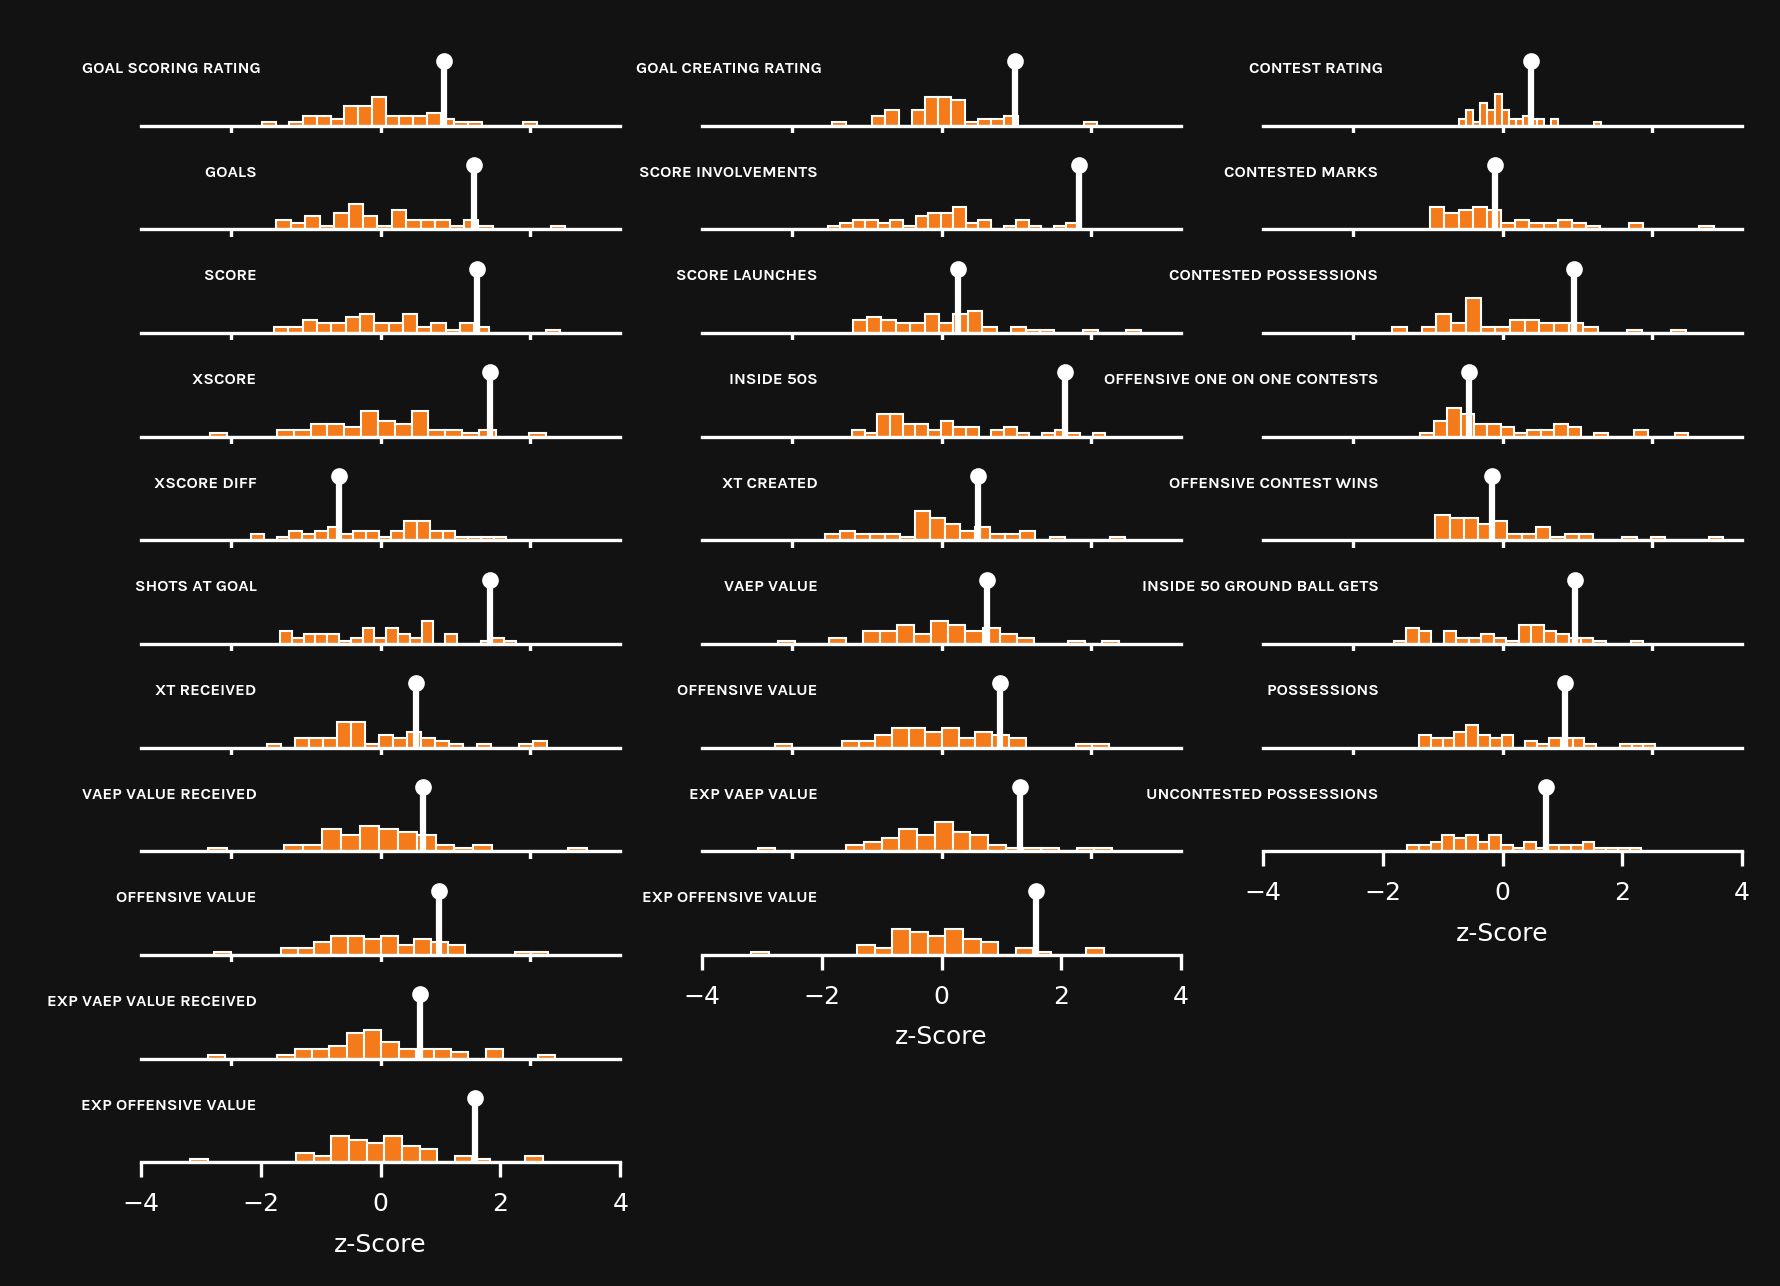

In [10]:
player = "Toby Greene"
team = "Greater Western Sydney"
season = 2023

stats_list = [['goal_scoring_rating'] + position_role_stats_zscaled['goal_scoring'], 
              ['goal_creating_rating'] + position_role_stats_zscaled['goal_creating'], 
              ['contest_rating'] + position_role_stats_zscaled['contest']]

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4)

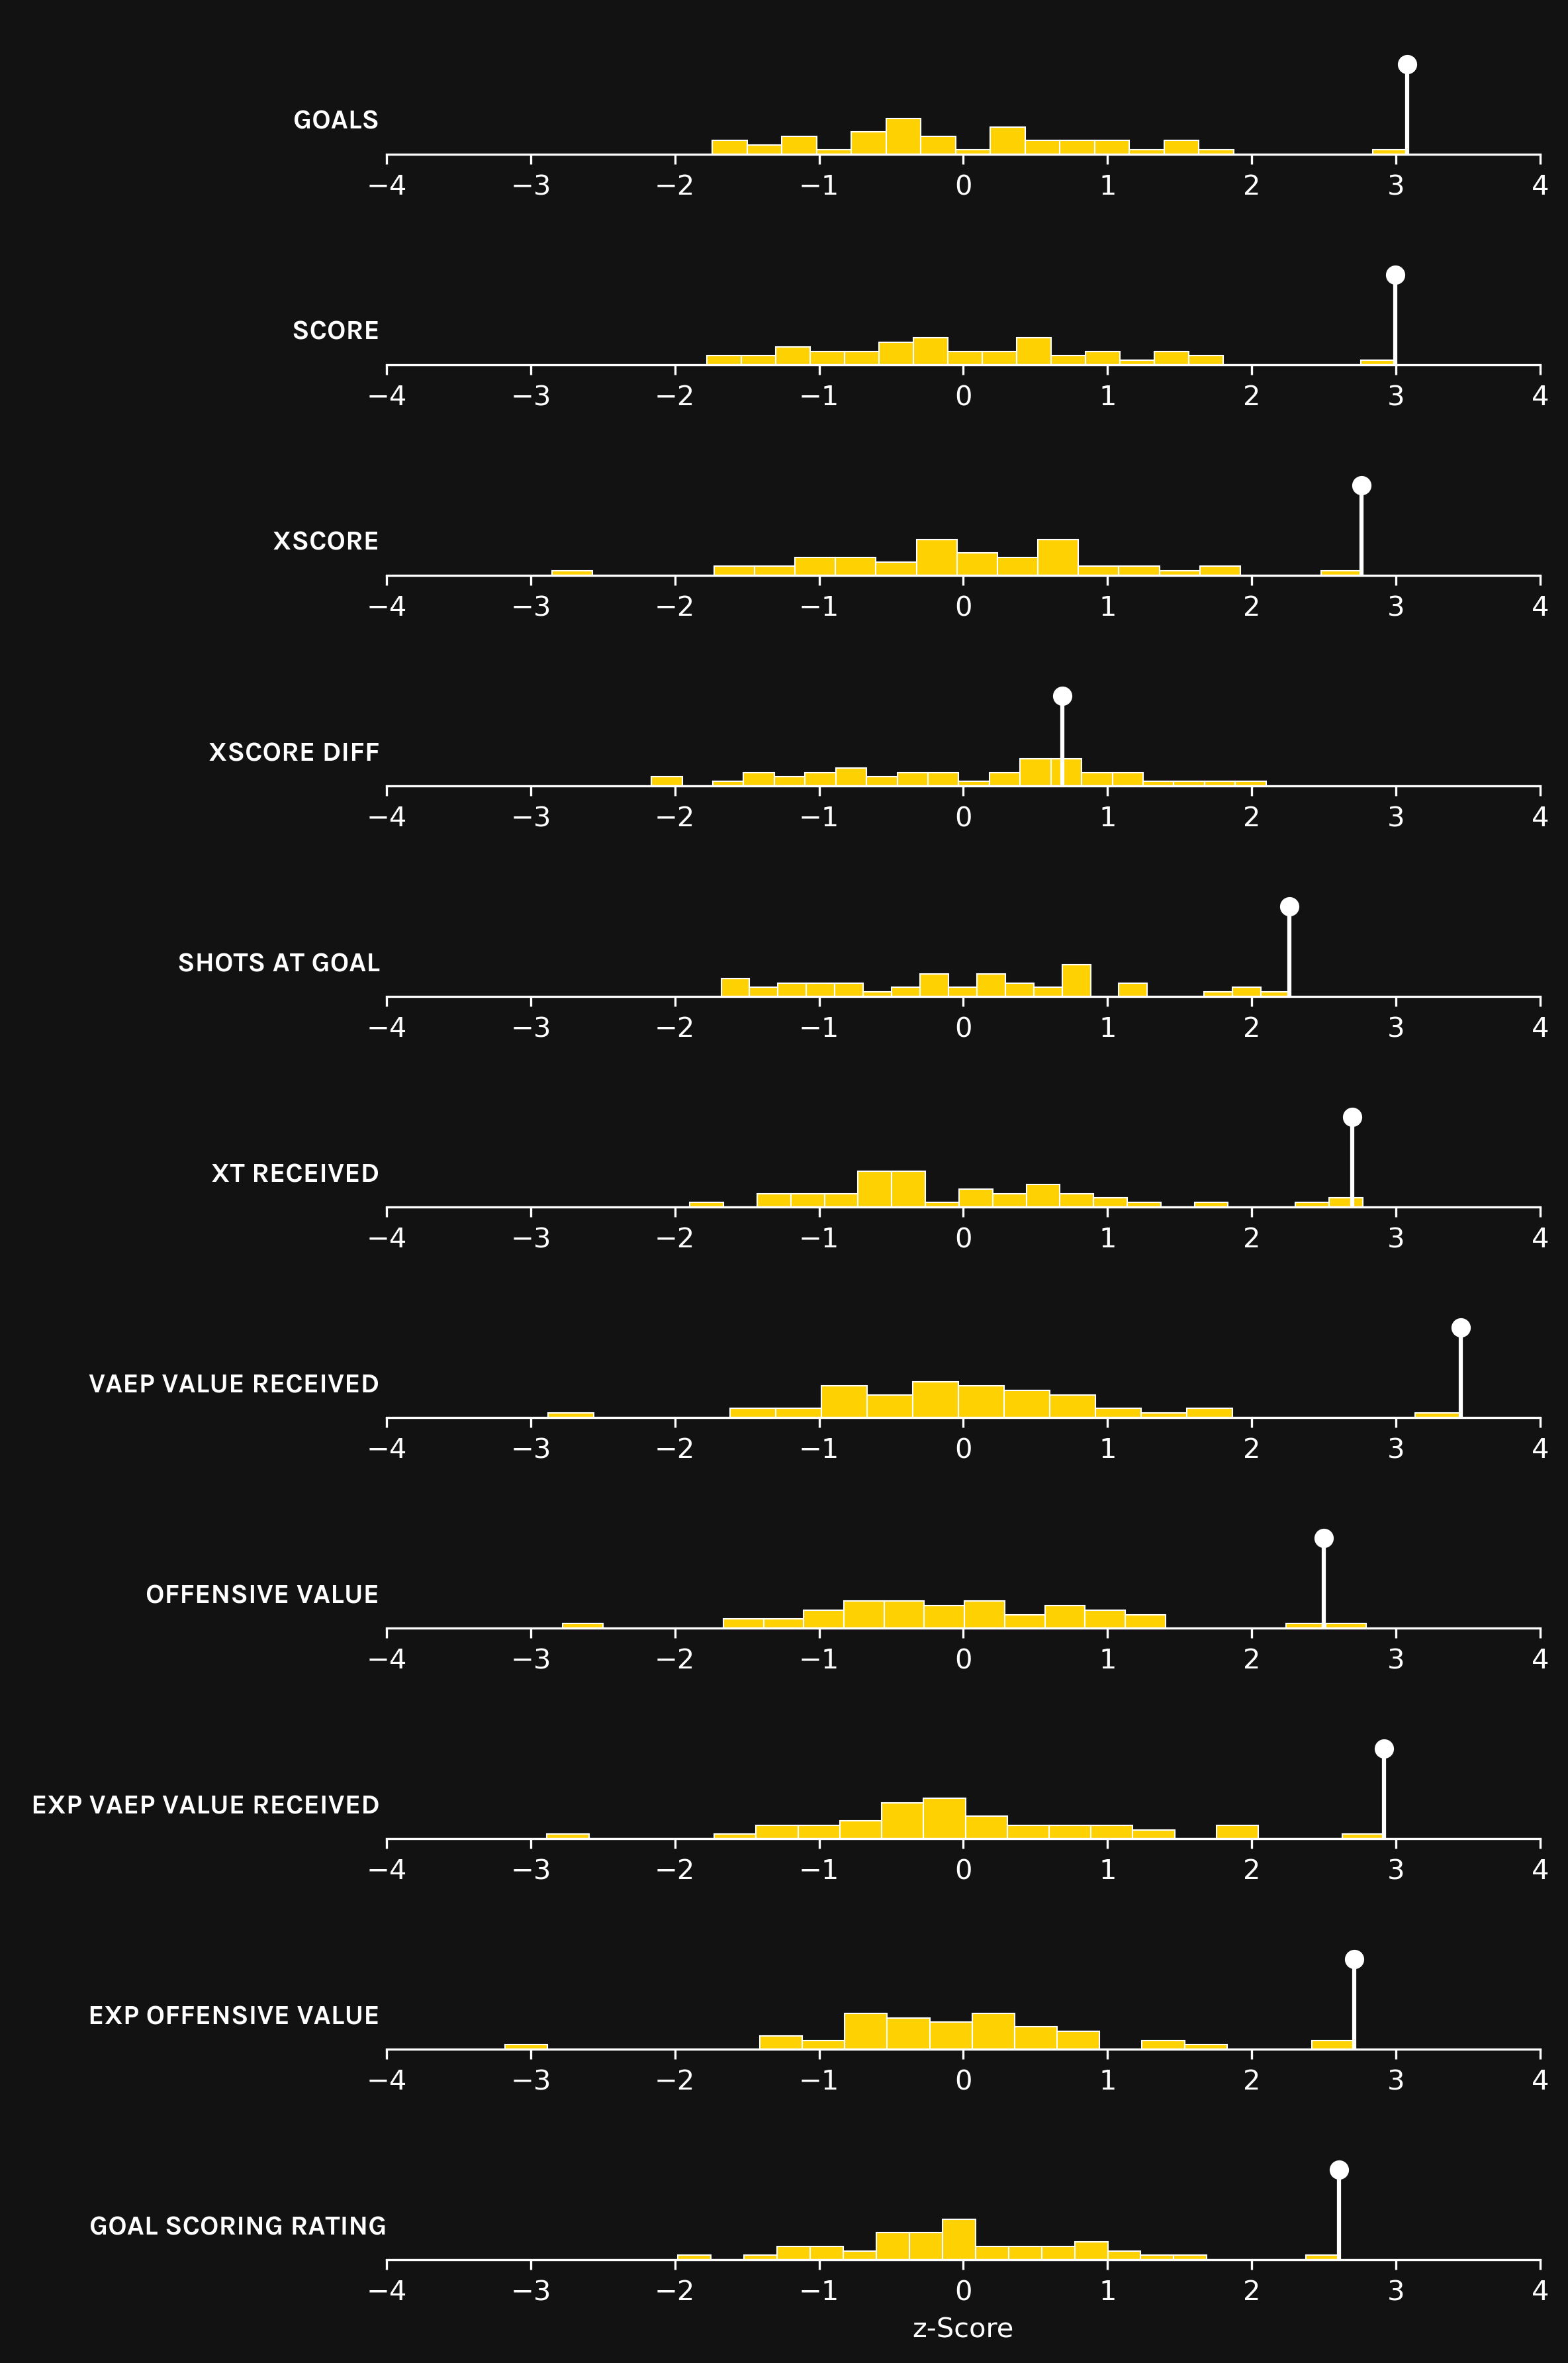

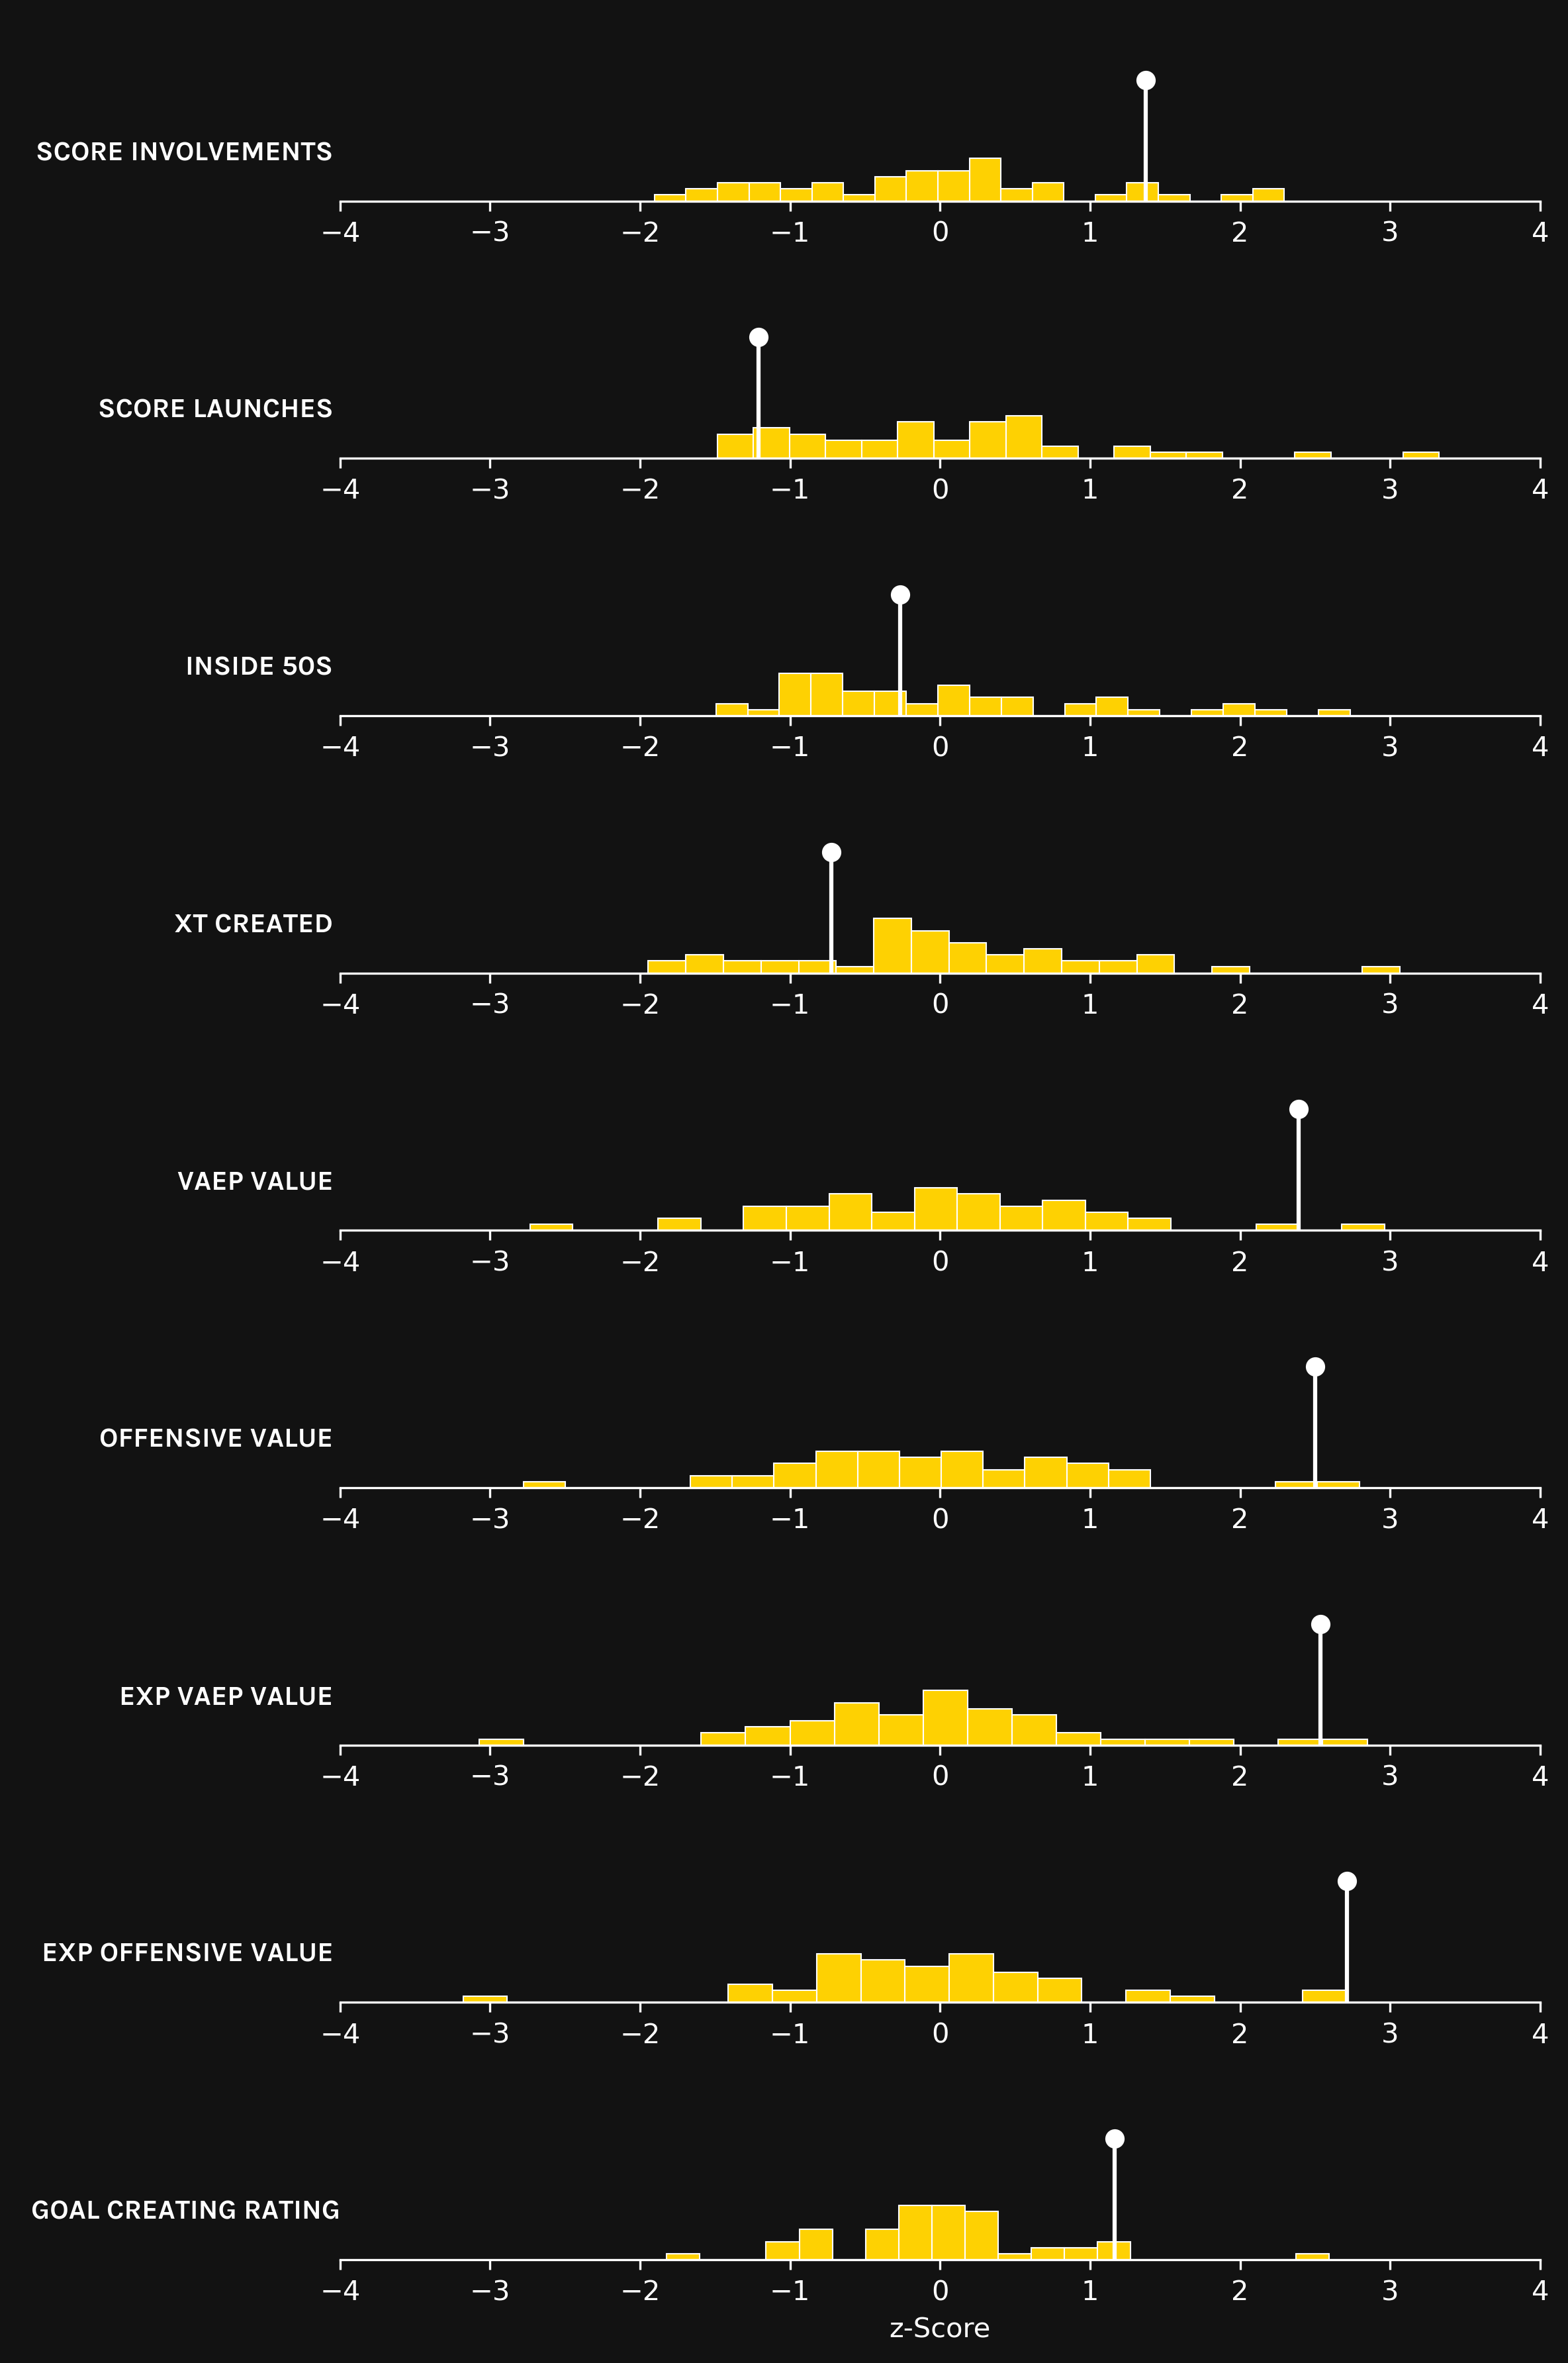

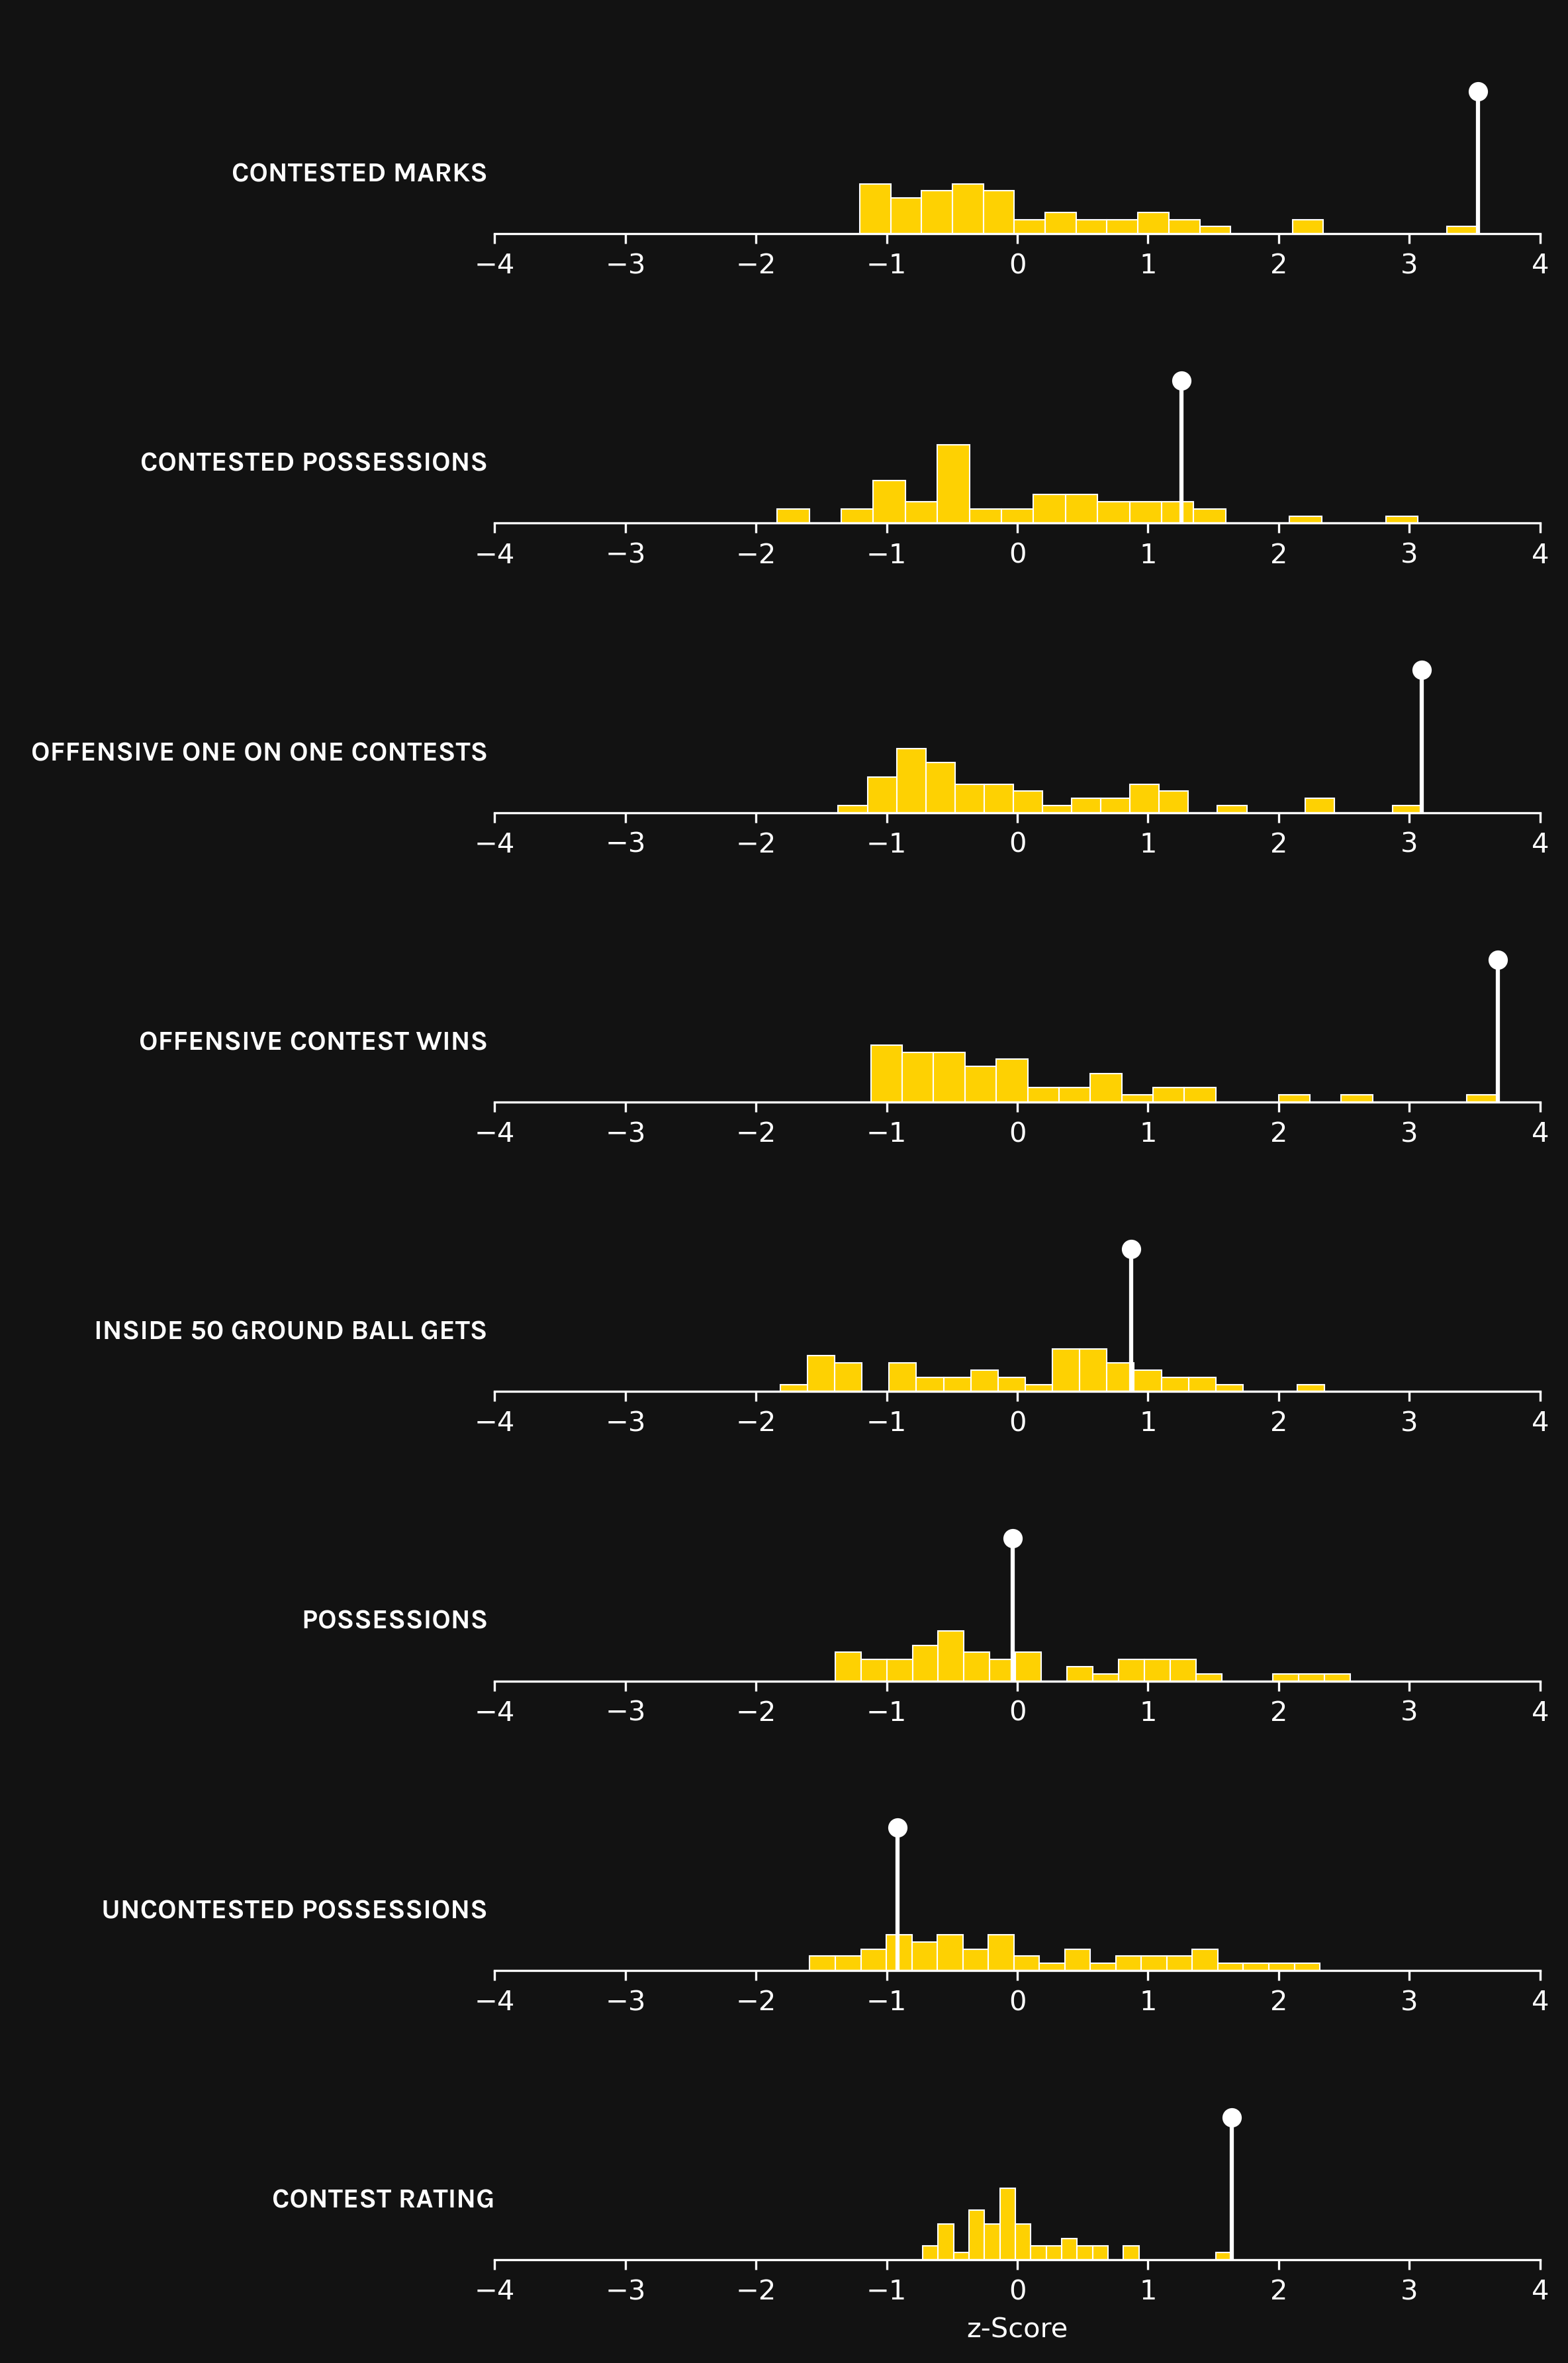

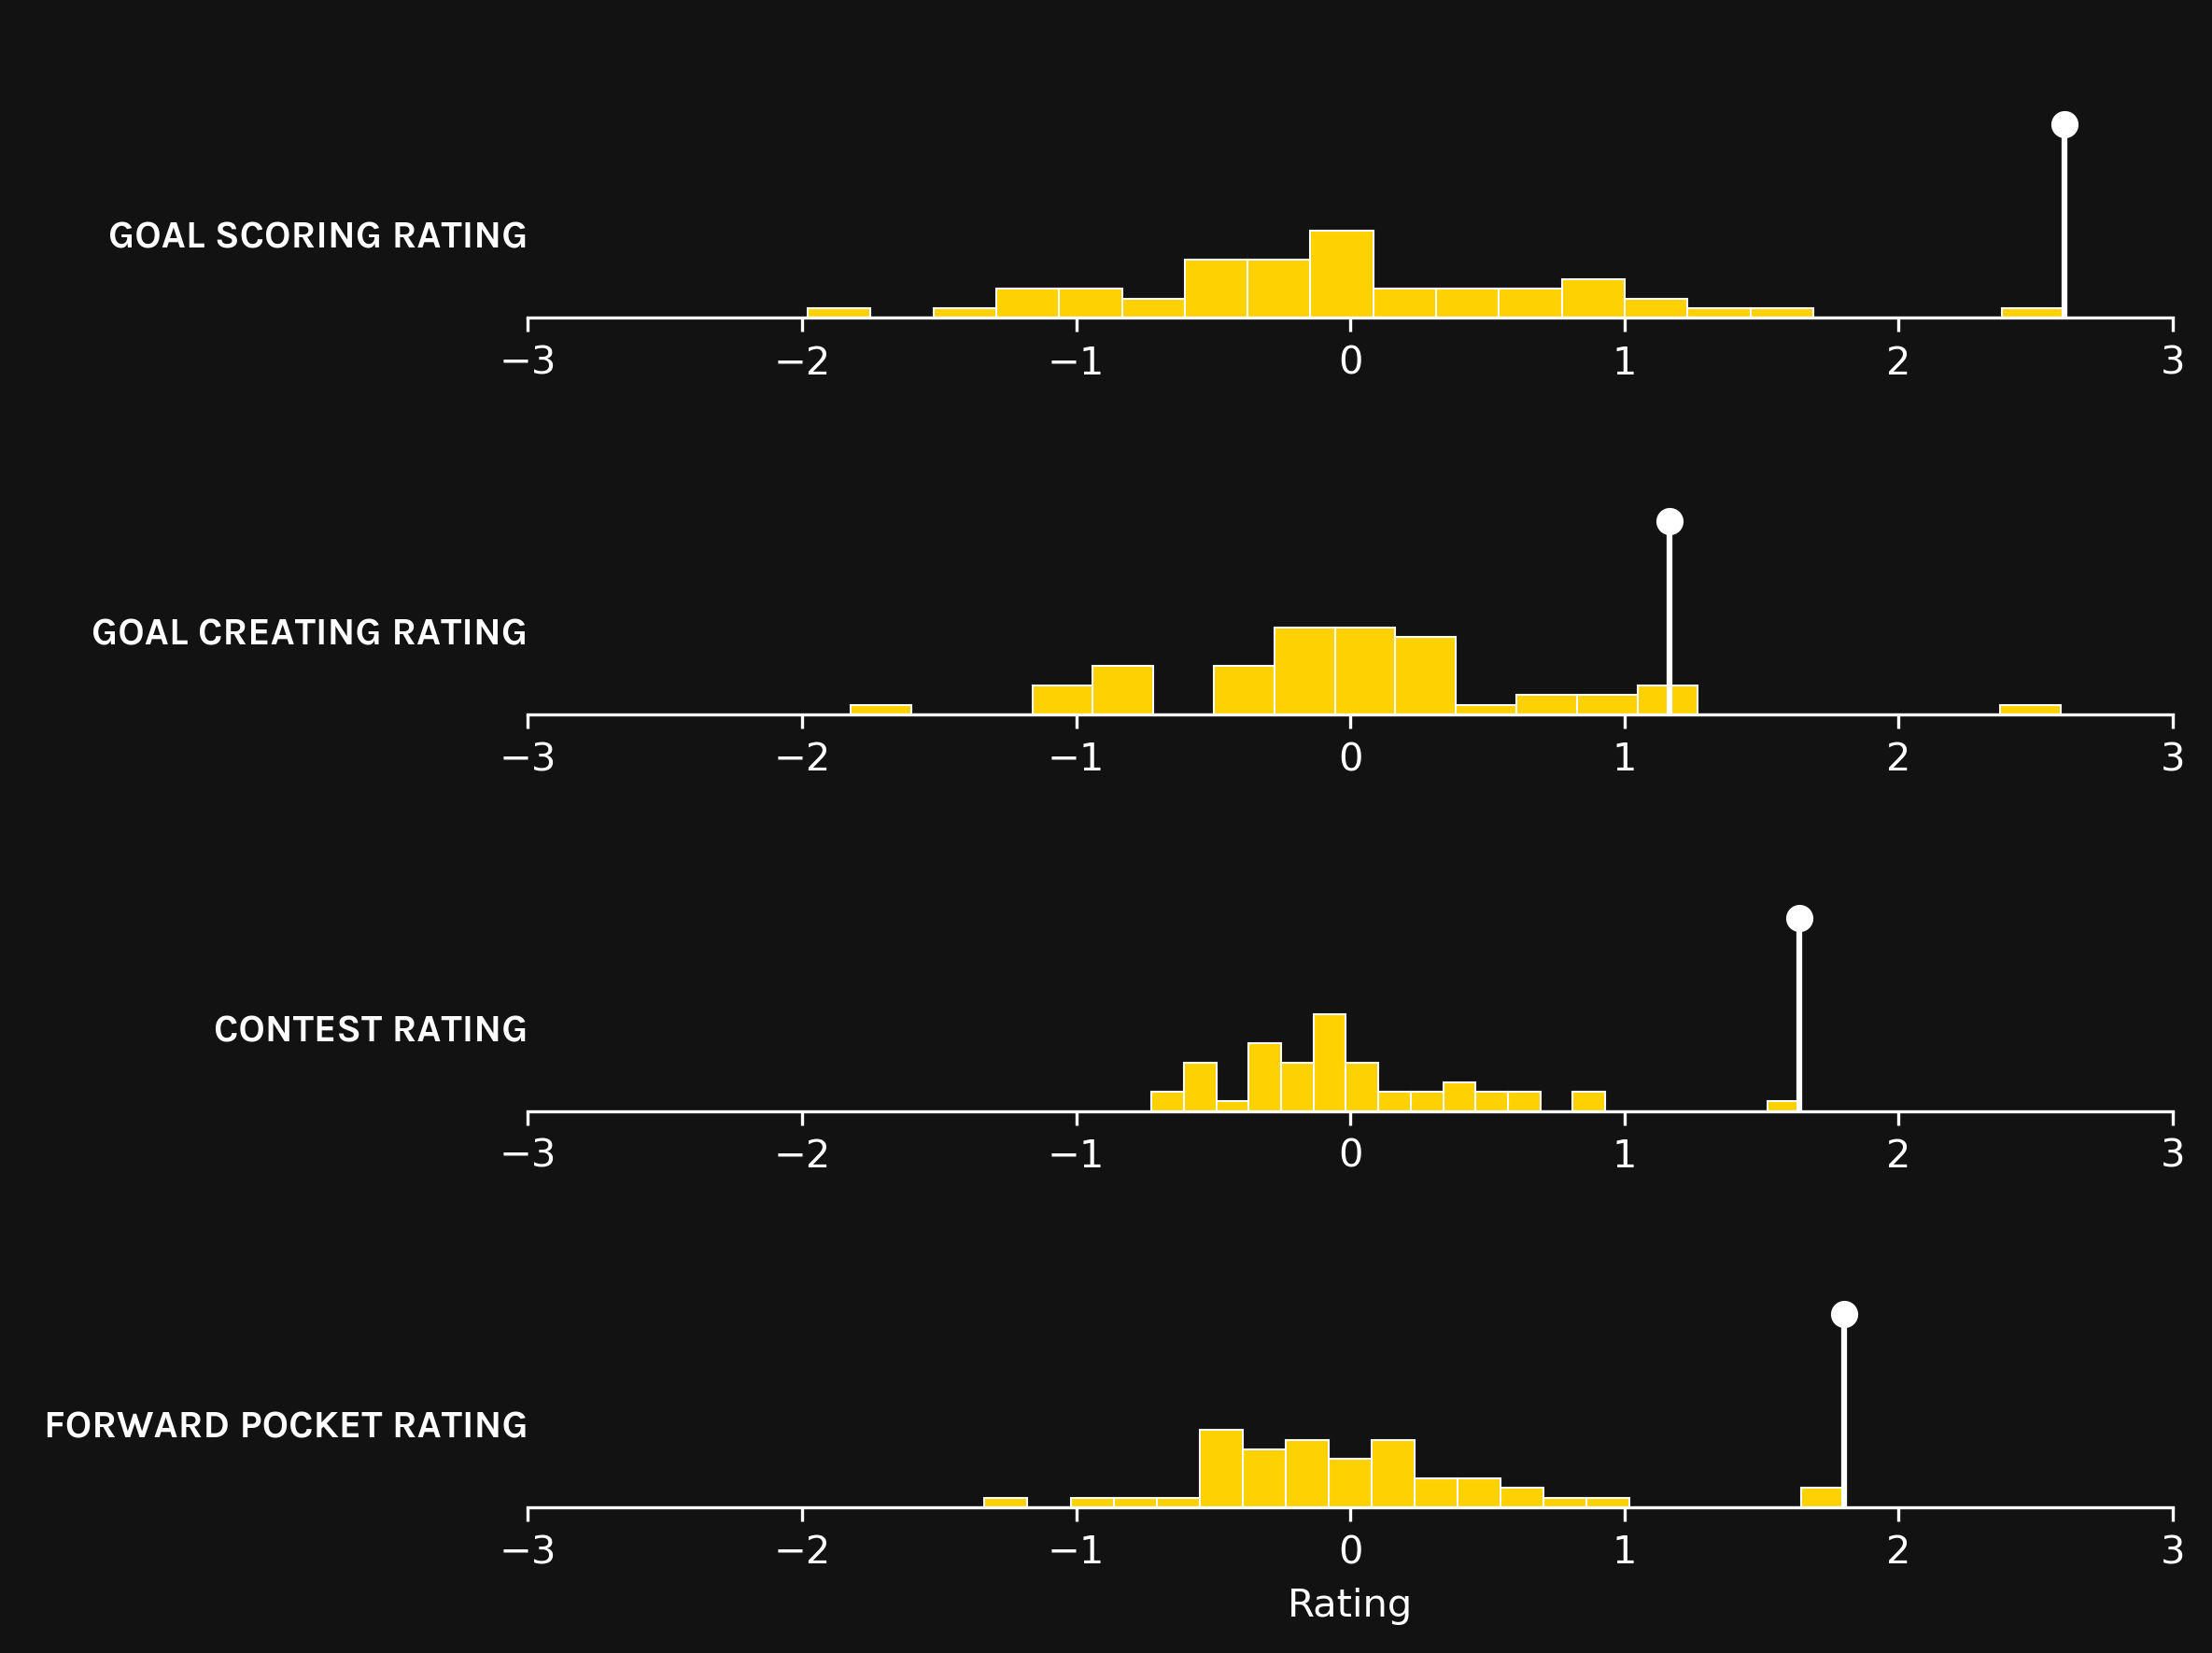

In [11]:
player = "Tom J. Lynch"
team = "Richmond"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    